In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.metrics import r2_score

# Multivariate Linear Regression

## Quick refresher

The general form of a multivariate regression is

$$
y \approx w_{0} +
w_{1} x_{1} + w_{2} x_{2} + \cdots + w_{p}x_p
$$

where $y$ is the response vector and $x_{1},…,x_{p}$ are the features (covariates). 
Each of the predictor variables must be numerical. 
The parameters (coefficients) $w_0,…,w_p$ correspond to the *effect* of each feature after taking account of the effect of all other features in the model. 

It is convenient to write this in matrix form where all the values of the forecast variable are given in a single equation. 

$$
X = \left[\begin{matrix} 1 & x_{1,1} & x_{2,1} & \dots & x_{p,1}\\ 1 & x_{1,2} & x_{2,2} & \dots & x_{p,2}\\ \vdots & \vdots & \vdots & & \vdots\\ 1 & x_{1,n} & x_{2,n} & \dots & x_{p,n} \end{matrix}\right].
$$

The first column correspond to the intercept ($w_0$) which does not multiply a feature.

The problem then becomes one of finding $w\in\mathbb R^p$ such that $y\approx Xw$ or, in other words,

$$
w^\star \quad\!\!=\quad\!\! \arg\min_w\|y-Xw\|_2^2
$$

## Loading the data + first look

* Load the data `bikes.csv`, have a look at it, 
* extract the columns `temperature`, `humidity` and `windspeed` to form the feature matrix
* extract the column `count` to form the response matrix

**Note**: you do not need to add a column of $1$ to the feature matrix, this is done automatically by Sklearn

In [12]:
# load the data and extract the feature matrix and the response as matrices/vectors
df = pd.read_csv("bikes.csv")
X = df[["temperature", "humidity", "windspeed"]]
y = df["count"]

Use a scatter matrix to have a look at the data, what can you observe?

**Note** you can use [pandas' scatter matrix](https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot).

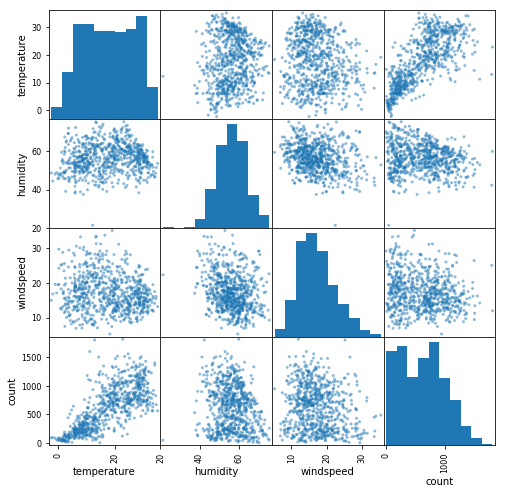

In [18]:
# add your code here to show a scatter 
pd.plotting.scatter_matrix(df, figsize=(8,8));

The last rows shows the relation between each feature and the number of bikes hired per day. 
It's hard to see any particular pattern in humidity and windspeed, while temperature definitely has a strong relation with the bikes hired.

Display the correlation coefficient (use `np.corrcoef`) between each of the three covariates and the response. 
(Cf [the documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) for `corrcoef`)

In [22]:
# add your code here
rho = np.corrcoef(X["temperature"], y)[0,1]
print("The correlation between {0:s} and bike count is {1:.2f}".format("temperature", rho))

The correlation between temperature and bike count is 0.74


In [24]:
# add your code here
for column_name, series in X.iteritems():
    rho = np.corrcoef(series, y)[0,1]
    print("The correlation between {0:s} and bike count is {1:.2f}".format(column_name, rho))

The correlation between temperature and bike count is 0.74
The correlation between humidity and bike count is -0.15
The correlation between windspeed and bike count is -0.16


In [23]:
# add your code here
for column in ["temperature", "humidity", "windspeed"]:
    rho = np.corrcoef(X[column], y)[0,1]
    print("The correlation between {0:s} and bike count is {1:.2f}".format(column, rho))

The correlation between temperature and bike count is 0.74
The correlation between humidity and bike count is -0.15
The correlation between windspeed and bike count is -0.16


The correlation coefficients confirm that the number of bikes hired is strongly correlated with the temperature. There also seems to be a smaller effect for humidity and windspeed. 
This makes sense intuitively; the better the weather is, the more likely people will want to go cycling. 
Now that you have a “feel” for the relationships between the two features and the response variable, you have a frame of reference when developing the regression model.

## Fitting a linear regression

Sklearn offers the `LinearRegression` from `sklearn.linear_model`. 
(Note that `sklearn.linear_model` has **a lot** of models to offer a few of which we will cover). 
Import it and have a look at the documentation using the question mark. 
Then, create an instance, fit it (on the whole data, exceptionally we will ignore the train-test-split step). 

In [38]:
# add your code here to apply and fit a linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [42]:
X_std = StandardScaler().fit_transform(X)

In [35]:
lreg = LinearRegression(normalize=True)

In [48]:
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

Have a look at the coefficients 

* `.coef_` will give you the coefficients for the actual covariates ($w_1, \dots, w_p$)
* `.intercept_` will give you the coefficient for the bias term ($w_0$)

In [47]:
# add your code to display the coefficients
print("Coefficients are:")
print(lreg.coef_)
print("Intercept is:")
print(lreg.intercept_)

Coefficients are:
[ 287.1193788   -96.85524744  -46.9014502 ]
Intercept is:
622.818930041


## Does the model match the data well?

You can get the model to predict values you may be interested in using the `.predict`. For example, what does your model suggest for the number of bikes hired at 20 degrees, 60% humidity and normalised windspeed 10?

In [56]:
# add your code here
x_test = np.array([[20, 60, 10]])
y_test = lreg.predict(x_test)
print("The predicted value is {0:.2f}".format(y_test[0]))

The predicted value is 714.00


Let's get `y_pred`, the prediction on the original data. Then display 

* the true counts vs the temperature
* the predicted counts vs the temperature

does it work well? 

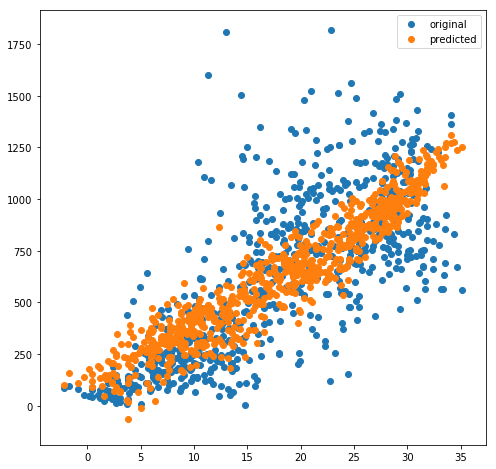

In [62]:
# add your code here
y_pred = lreg.predict(X)
plt.scatter(X["temperature"], y);
plt.scatter(X["temperature"], y_pred);
plt.gcf().set_size_inches(8,8)
plt.legend(["original", "predicted"])

In this case we see that the model picks up a trend but the model is likely too simple to really capture the information contained in the data. 

**Question**: why are the predictions not on a straight line?

### Residuals diagnostic

When a Linear regression model is properly working we have that the difference between predictions and targets should not present any particular structure. To study this, we introduce the concept of residual. A residual can be defined as follows:

$$
r = y-\hat y
$$

Where $\hat y$ is the prediction made by the model and $y$ is the response.

Have a look for the bike dataset, what do you observe? 

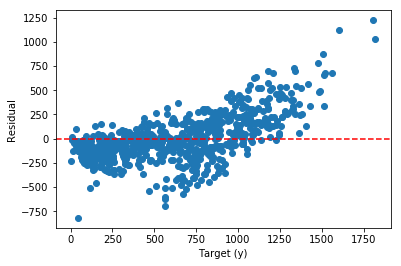

In [71]:
# add your code to display the residuals vs the target variable (y) 
r = y - y_pred
plt.scatter(y, r)
plt.xlabel("Target (y)")
plt.ylabel("Residual")
plt.gca().axhline(0, color="red", linestyle="--")

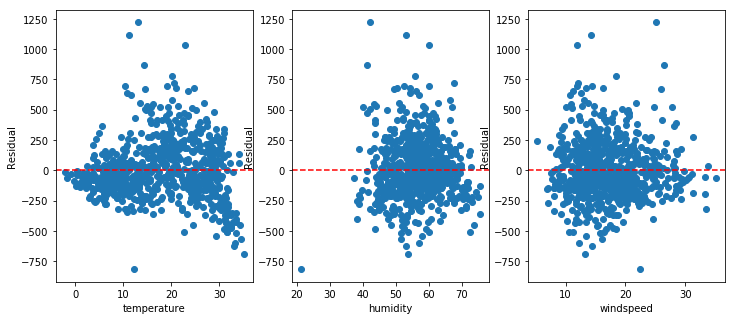

In [81]:
r = y - y_pred
fig, axs = plt.subplots(1,3, figsize=(12,5))
for ix, column in enumerate(["temperature", "humidity", "windspeed"]):
    ax = axs[ix]
    ax.scatter(X[column], r)
    ax.set_xlabel(column)
    ax.set_ylabel("Residual")
    ax.axhline(0, color="red", linestyle="--");

### Looking at another dataset

We will re-do these steps with a few variations on a different dataset.

Load the Boston dataset, where the median value in '000s is the response.

In [130]:
import sklearn.datasets
import seaborn as sns
import copy
from sklearn.datasets import load_boston

In [147]:
X, y = load_boston(return_X_y=True)
names = load_boston()['feature_names']
X = pd.DataFrame(X, columns=names)

In [148]:
df = copy.deepcopy(X)
df["target"] = y

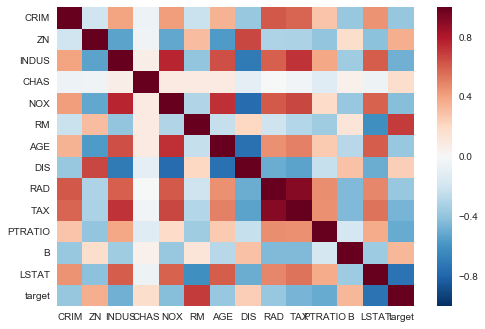

In [149]:
sns.heatmap(df.corr());

In [150]:
# your code here
lreg = LinearRegression(normalize=True)
lreg.fit(X, y)
y_pred = lreg.predict(X)

In [151]:
print("The R^2 is {:.2f}".format(r2_score(y, y_pred)))

The R^2 is 0.74


In [159]:
import statsmodels.api

/Users/alexbird/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


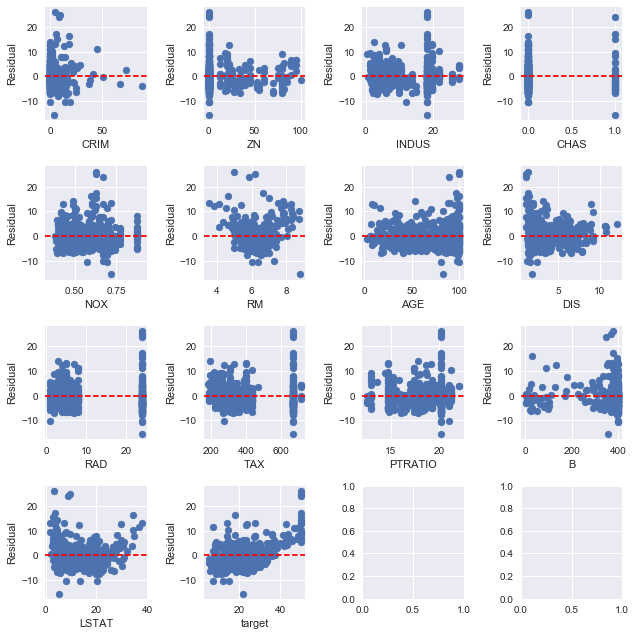

In [154]:
r = y - y_pred
fig, axs = plt.subplots(4,4, figsize=(9,9))
for ix, column in enumerate(df.columns):
    i_1 = ix // 4
    i_2 = ix % 4
    ax = axs[i_1, i_2]
    ax.scatter(df[column], r)
    ax.set_xlabel(column)
    ax.set_ylabel("Residual")
    ax.axhline(0, color="red", linestyle="--");

plt.tight_layout()

A plot of the residuals against the fitted values should show no pattern. 
If a pattern is observed, it means that the model is not able to fully capture the information in the data. 
To overcome this problem, a transformation of the forecast variable (such as a log transformation) may help.

Plot the residuals against the response and discuss whether there is a pattern

### Using the 'auto' dataset

[*didn't cover on Monday*]
We will re-do these steps with a few variations on a different dataset.

Load the `auto.csv` dataset. Extract the columns `displacement`, `horsepower` and `weight` for the feature matrix and `mpg` as the response. 

In [ ]:
# your code here


The plot seems to show a systematic pattern as the variation in the residuals changes with the response, additionally there seems to be an upward pattern. 

To explore this further, we can do a scatterplot of the residuals against each predictor in the model to test whether a pattern can be observed there.
If these scatterplots show a pattern, the relationship may be nonlinear (or better explained by a nonlinear model). 

In [ ]:
# show the scatterplots of the residuals vs the features


### Adding non-linear features

The charts suggest a nonlinear relationship between the features and the residuals. 
One thing we could do is add transformed features. 
For example the log of the features (note that all the features are positive so this does not cause issues).  

The first part of the cell is a **FeatureUnion**, it allows to combine derived features. 
It is extremely convenient and, combined with **Pipeline** can bring a lot of flexibility to your models. 
This will be covered in much more details tomorrow, for now try to get an intuition for what it does.

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer

feat_union = FeatureUnion([
    ('identity', FunctionTransformer()),
    ('log-transform', FunctionTransformer(np.log))])

X2 = feat_union.fit_transform(X)

print("Before: {}".format(X.shape))
print("After: {} (with log features)".format(X2.shape))

## Quality assessment: the R-squared

As you have seen, the R-squared (R2) is a measure of fit quality when applying a linear regression.
It is obtained by comparing the RSS to the TSS:

$$
R^2 = 1-{RSS \over TSS}
$$

where

* the RSS is the squared norm of the residual vector
* the TSS is the squared norm of the centered response vector 

**Tasks**

* compute the RSS
* compute the TSS
* compute the R2 (you should get something around `0.7`)

In [87]:
#
print("The R^2 is: {:.2f}".format(r2_score(y, y_pred)*100))

The R^2 is: 61.20


This metric is fairly easy to interpret:

- it's close to 1 if the model explains much of the variance.
- it's close to 0 if the model explains little of the variance.

***Question***: can this value be negative or more than 1?